In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error

In [59]:
#load dataset to pandas datafram
df = pd.read_csv("datasets/Loan Prediction/dataset.csv")

In [60]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
df.shape

(614, 13)

In [62]:
# statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [63]:
# number of missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [64]:
# dropping missing values because I can't replace them in a logical way
df = df.dropna()

In [65]:
#No missing values anymore
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [66]:
#Chceking the data once again
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [67]:
# label encoding to change string categories into numbers we can use
# We can use ----> df.replace({"Loan_Status":{"N":0, "Y":1}}, inplace=True)
# We can also use ----> df.replace(to_replace={'N':0, 'Y':1}, inplace=True)
# But an easier, more profound way is to use LabelEncoder ( I think )

le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])


In [68]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [69]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167,0.691667
std,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.462287
min,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000,1.000000


In [70]:
# Dependent column values
# Notice the 3+, we have to change that
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [71]:
# Replacing the "3+" with int 4 
df.replace({'Dependents':{"3+":4}}, inplace=True)

## Data Visualization


In [72]:
#Another way to do it df = df.replace(to_replace={'Yes':1, 'No':0, 'Male':1, 'Female':0, 'Graduate':1, 'Not Graduate':0, 'Rural':0, 'Semiurban':1, 'Urban':2})
#Transforming all of the categorecal columns 
columns_to_transform = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

for column in columns_to_transform:
    df[column] = le.fit_transform(df[column])

In [73]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [74]:
print(df['Property_Area'].value_counts())

1    191
2    150
0    139
Name: Property_Area, dtype: int64


In [75]:
# Separating the data
X = df.drop(columns=['Loan_ID','Loan_Status'], axis=1)
Y = df['Loan_Status']
print(X)
print("=============================================================")
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          0              0             4583   
2         1        1          0          0              1             3000   
3         1        1          0          1              0             2583   
4         1        0          0          0              0             6000   
5         1        1          2          0              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          0              0             2900   
610       1        1          4          0              0             4106   
611       1        1          1          0              0             8072   
612       1        1          2          0              0             7583   
613       0        0          0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

## Train Test Split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

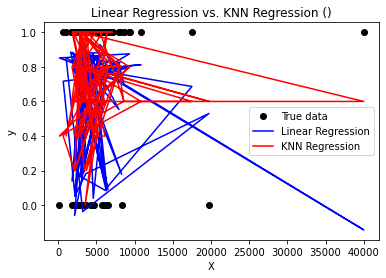

In [77]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# KNN Regression
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)

# Plot the results
plt.scatter(X_test['ApplicantIncome'], y_test, color='black', label='True data')
plt.plot(X_test['ApplicantIncome'], y_pred_linear, color='blue', label='Linear Regression')
plt.plot(X_test['ApplicantIncome'], y_pred_knn, color='red', label='KNN Regression')
plt.title('Linear Regression vs. KNN Regression ()')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

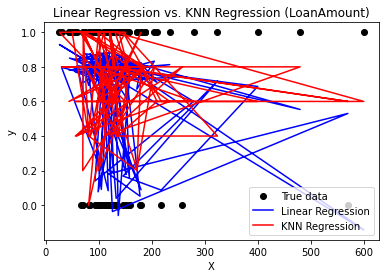

In [78]:
plt.scatter(X_test['LoanAmount'], y_test, color='black', label='True data')
plt.plot(X_test['LoanAmount'], y_pred_linear, color='blue', label='Linear Regression')
plt.plot(X_test['LoanAmount'], y_pred_knn, color='red', label='KNN Regression')
plt.title('Linear Regression vs. KNN Regression (LoanAmount)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

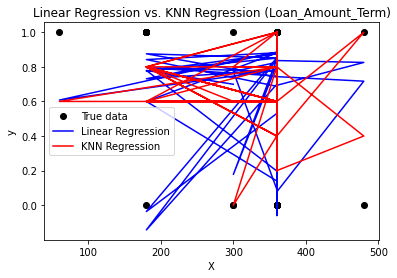

In [79]:
plt.scatter(X_test['Loan_Amount_Term'], y_test, color='black', label='True data')
plt.plot(X_test['Loan_Amount_Term'], y_pred_linear, color='blue', label='Linear Regression')
plt.plot(X_test['Loan_Amount_Term'], y_pred_knn, color='red', label='KNN Regression')
plt.title('Linear Regression vs. KNN Regression (Loan_Amount_Term)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

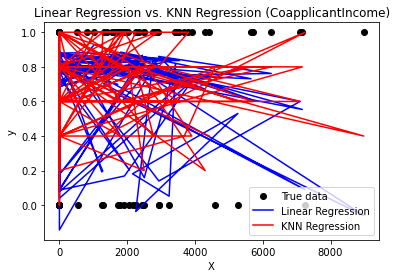

In [80]:
plt.scatter(X_test['CoapplicantIncome'], y_test, color='black', label='True data')
plt.plot(X_test['CoapplicantIncome'], y_pred_linear, color='blue', label='Linear Regression')
plt.plot(X_test['CoapplicantIncome'], y_pred_knn, color='red', label='KNN Regression')
plt.title('Linear Regression vs. KNN Regression (CoapplicantIncome)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [81]:
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)
mae = mean_absolute_error(y_test, y_pred_linear)

In [82]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error: 0.14895716714979473
R-squared: 0.30667209472095547
Mean Absolute Error (MAE): 0.30


In [83]:
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)
mae = mean_absolute_error(y_test, y_pred_knn)

In [84]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error: 0.27
R-squared: -0.2567272727272729
Mean Absolute Error (MAE): 0.43
